# WeatherPy
***

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


***

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

###  Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | taksimo
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ilhabela
Processing Record 14 of Set 1 | bandarbeyla
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | beidaihehaibin
Processing Record 18 of Set 1 | findlay
Processing Record 19 of Set 1 | nelspruit
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | we
City not found. Skipping...
Processing Record 22 of S

Processing Record 37 of Set 4 | camacupa
Processing Record 38 of Set 4 | portland
Processing Record 39 of Set 4 | milas
Processing Record 40 of Set 4 | alamogordo
Processing Record 41 of Set 4 | port alfred
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | maubara
City not found. Skipping...
Processing Record 44 of Set 4 | pruzhany
Processing Record 45 of Set 4 | axim
Processing Record 46 of Set 4 | theniet el had
Processing Record 47 of Set 4 | minas de marcona
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | noumea
Processing Record 0 of Set 5 | pontotoc
Processing Record 1 of Set 5 | callao
Processing Record 2 of Set 5 | badger
Processing Record 3 of Set 5 | castillos
Processing Record 4 of Set 5 | gargalianoi
Processing Record 5 of Set 5 | port saint john's
Processing Record 6 of Set 5 | isafjordur
Processing Record 7 of Set 5 | tyazhinskiy
Processing Record 8 of Set 5 | zeya
Processing Record 9 of Set 5 | n'zeto
Processing Record 

Processing Record 29 of Set 8 | wenling
Processing Record 30 of Set 8 | tanki leendert
City not found. Skipping...
Processing Record 31 of Set 8 | mbala
Processing Record 32 of Set 8 | woods creek
Processing Record 33 of Set 8 | quellon
Processing Record 34 of Set 8 | sawakin
Processing Record 35 of Set 8 | 'ibri
City not found. Skipping...
Processing Record 36 of Set 8 | cosne-cours-sur-loire
Processing Record 37 of Set 8 | ha'il
Processing Record 38 of Set 8 | sydney mines
Processing Record 39 of Set 8 | zaozersk
Processing Record 40 of Set 8 | machali
Processing Record 41 of Set 8 | ranavav
Processing Record 42 of Set 8 | dhidhdhoo
Processing Record 43 of Set 8 | hengchun
Processing Record 44 of Set 8 | valdez
Processing Record 45 of Set 8 | veraval
Processing Record 46 of Set 8 | nieuw amsterdam
Processing Record 47 of Set 8 | dhulia
Processing Record 48 of Set 8 | karlskrona
Processing Record 49 of Set 8 | beibei
Processing Record 0 of Set 9 | necocli
Processing Record 1 of Set 9 

Processing Record 18 of Set 12 | ola
Processing Record 19 of Set 12 | ahau
City not found. Skipping...
Processing Record 20 of Set 12 | vecpiebalga
Processing Record 21 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 22 of Set 12 | okhotsk
Processing Record 23 of Set 12 | camana
Processing Record 24 of Set 12 | amarante do maranhao
Processing Record 25 of Set 12 | ponmana
City not found. Skipping...
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | salinas de hidalgo
Processing Record 28 of Set 12 | awjilah
Processing Record 29 of Set 12 | belo sur tsiribihina
Processing Record 30 of Set 12 | klaksvik
Processing Record 31 of Set 12 | oakdale
Processing Record 32 of Set 12 | foca
Processing Record 33 of Set 12 | sterling
Processing Record 34 of Set 12 | candelaria
Processing Record 35 of Set 12 | dezhou
Processing Record 36 of Set 12 | aban
Processing Record 37 of Set 12 | zboriv
Processing Record 38 of Set 12 | acajutla
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,17.98,89,30,3.65,MG,1687493820
1,taksimo,56.3444,114.8794,28.74,34,45,1.50,RU,1687493820
2,port-aux-francais,-49.3500,70.2167,8.12,97,100,17.42,TF,1687493820
3,waitangi,-43.9535,-176.5597,11.01,81,8,1.79,NZ,1687493820
4,adamstown,-25.0660,-130.1015,20.63,50,45,8.60,PN,1687493820


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,17.98,89,30,3.65,MG,1687493820
1,taksimo,56.3444,114.8794,28.74,34,45,1.50,RU,1687493820
2,port-aux-francais,-49.3500,70.2167,8.12,97,100,17.42,TF,1687493820
3,waitangi,-43.9535,-176.5597,11.01,81,8,1.79,NZ,1687493820
4,adamstown,-25.0660,-130.1015,20.63,50,45,8.60,PN,1687493820


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

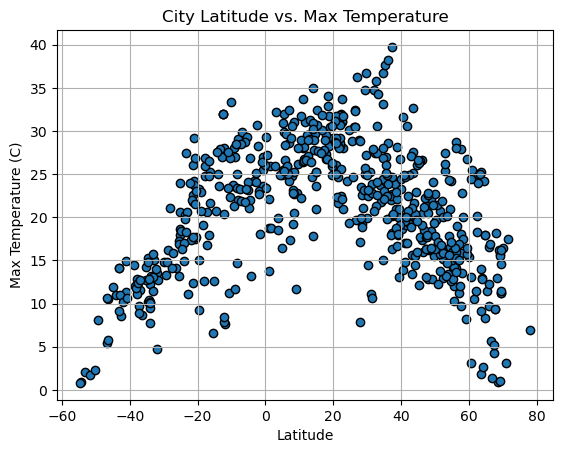

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

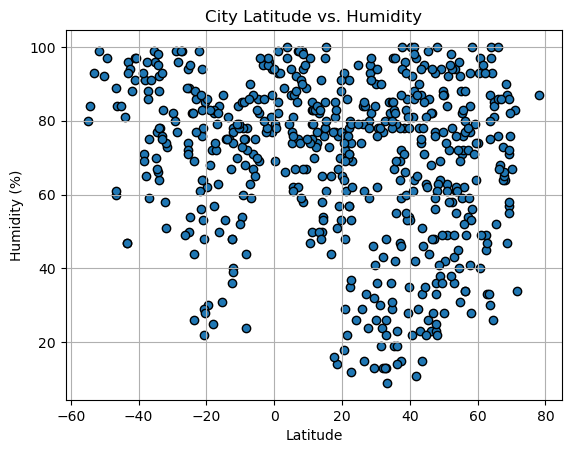

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

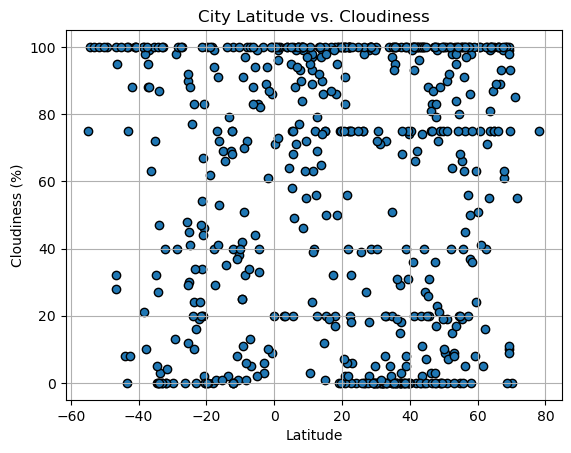

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

####  Latitude vs. Wind Speed Plot

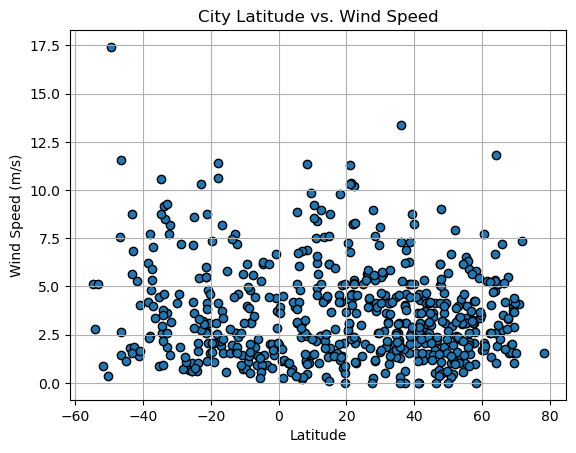

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

***

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linear_regression(df, x_col_name, y_col_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_col_name], df[y_col_name])
    regress_values = df[x_col_name] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(df[x_col_name], df[y_col_name])
    plt.plot(df[x_col_name],regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_col_name)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,taksimo,56.3444,114.8794,28.74,34,45,1.50,RU,1687493820
5,gadzhiyevo,69.2551,33.3362,15.71,57,10,3.93,RU,1687493820
6,georgetown,5.4112,100.3354,31.96,62,20,3.09,MY,1687493535
7,kenai,60.5544,-151.2583,13.05,93,100,2.06,US,1687493821
8,olonkinbyen,70.9221,-8.7187,3.10,83,85,4.11,SJ,1687493821


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,17.98,89,30,3.65,MG,1687493820
2,port-aux-francais,-49.3500,70.2167,8.12,97,100,17.42,TF,1687493820
3,waitangi,-43.9535,-176.5597,11.01,81,8,1.79,NZ,1687493820
4,adamstown,-25.0660,-130.1015,20.63,50,45,8.60,PN,1687493820
10,edinburgh of the seven seas,-37.0676,-12.3116,11.55,59,99,7.06,SH,1687493821


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40089167159793493


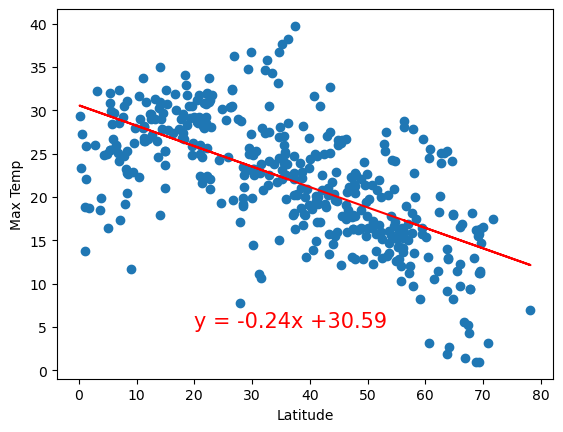

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.5840444975588421


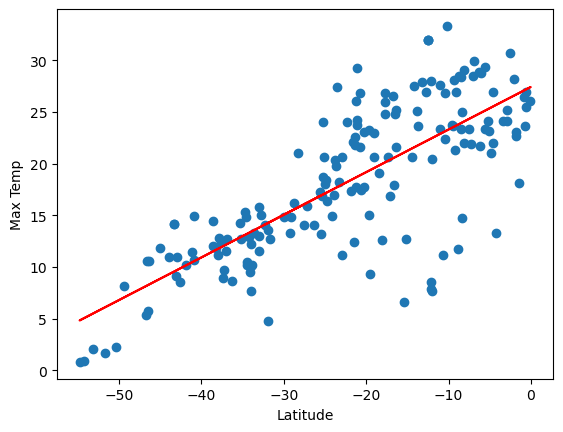

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp")

#### Discussion about the linear relationship: 
We can observe a moderate negative correlation in the northern hemisphere and a moderate positive correlation in the southern hemisphere between the latitude and the temperature. The R-squared for this regression model tells us that: 
  - In the northern hemisphere: around 40.1% of the variation in the temperature in a specific location can be explained by the latitude
  - In the southern hemisphere: around 58.4% of the variation in the temperature in a specific location can be explaiend by the latitude

### Humidity vs. Latitude Linear Regression Plot 

The r-value is: 0.012770196030926204


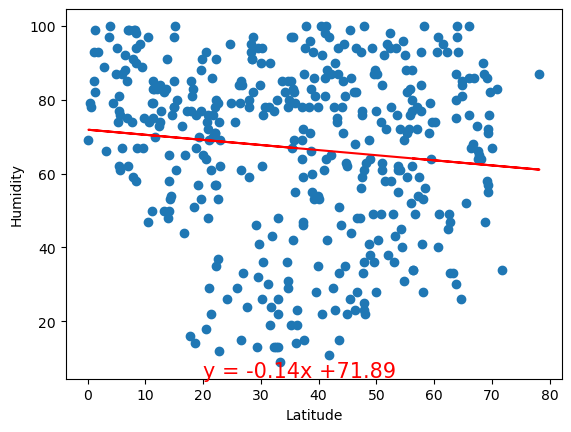

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.0288937264288307


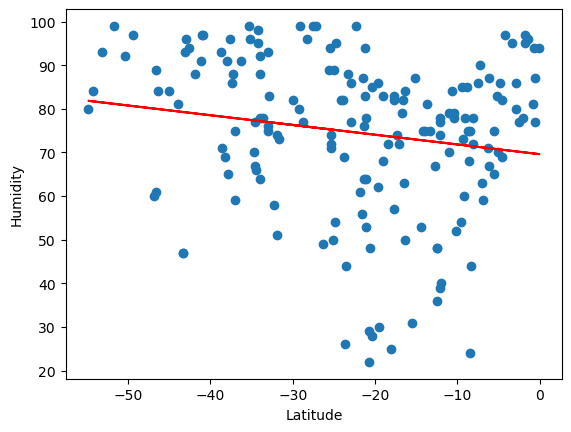

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity")

#### Discussion about the linear relationship: 
We can observe that there is almost no correlation between the latitude and the humidity. only 1.2% in the northern hemisphere and 2.8% in the southern hemisphere of the variation in the humidity can be explained by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0027672578195877596


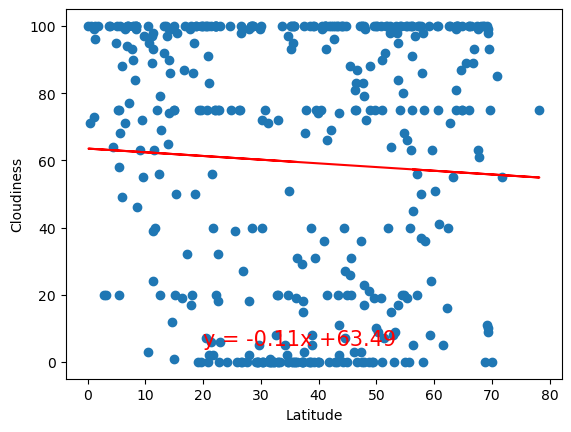

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.015917206922699174


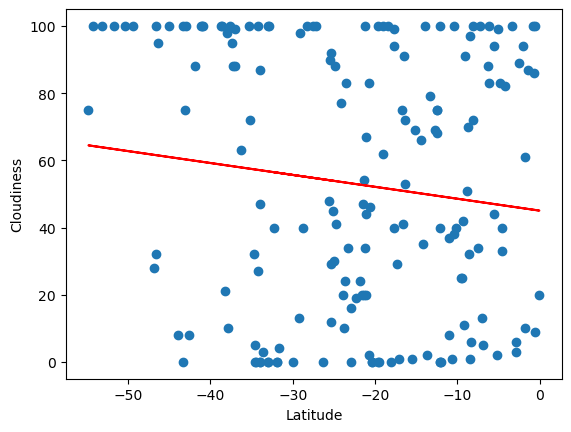

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness")

#### Discussion about the linear relationship: 
We can observe that there is almost no correlation between the latitude and the cloudiness. only 0.2% in the northern hemisphere and 1.5% in the southern hemisphere of the variation in the cloudiness can be explained by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00846313538423715


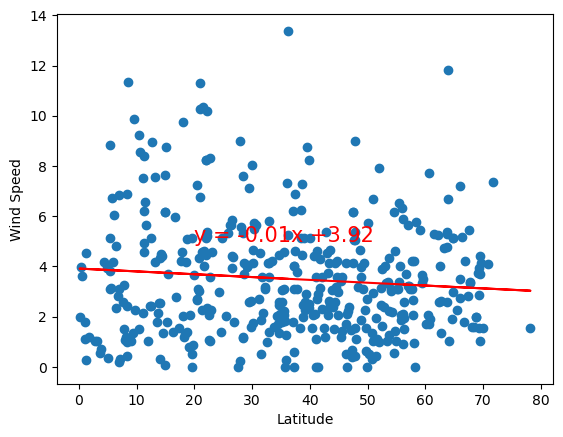

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.04935390397670077


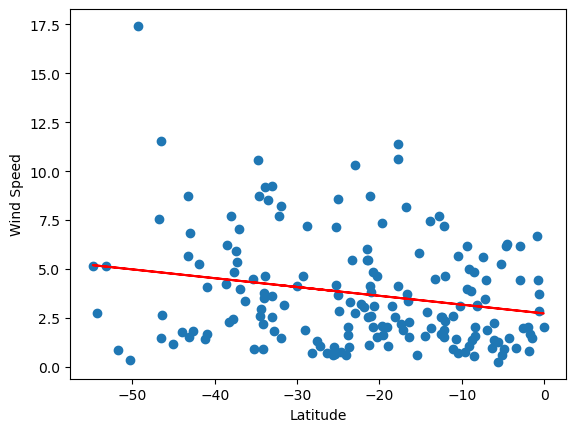

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed")

#### Discussion about the linear relationship: 
We can observe that there is a very weak to no correlation between the latitude and the wind speed. only 0.8% in the northern hemisphere and 4.9% in the southern hemisphere of the variation in the wind speed can be explained by the latitude.